# Word Embedding Exploration

This notebook explores word embeddings using the NLP Pipeline library.

**Topics covered:**
1. Loading embeddings (Word2Vec, GloVe)
2. Exploring the embedding space
3. Similarity search
4. Word analogies
5. Visualizing embeddings with t-SNE
6. Text classification with embeddings

In [1]:
# Setup
import sys
sys.path.insert(0, '../src')

import numpy as np
import matplotlib.pyplot as plt
from nlp_pipeline import WordEmbeddings, Pipeline, EmbeddingClassifier

# For nice plots
plt.style.use('seaborn-v0_8-whitegrid')
%matplotlib inline

## 1. Loading Embeddings

We'll create sample embeddings to explore. In practice, you'd load pre-trained embeddings like GloVe or Word2Vec.

In [2]:
# Create sample embeddings with semantic relationships
embeddings = WordEmbeddings.from_dict({
    # Royalty (clustered together)
    "king": [0.8, 0.7, -0.3, 0.1, 0.2],
    "queen": [0.8, 0.6, 0.4, 0.1, 0.2],
    "prince": [0.7, 0.6, -0.2, 0.2, 0.1],
    "princess": [0.7, 0.5, 0.3, 0.2, 0.1],
    "throne": [0.6, 0.5, 0.0, 0.0, 0.3],
    "crown": [0.6, 0.4, 0.1, 0.0, 0.3],
    
    # Gender pairs
    "man": [0.3, 0.4, -0.6, 0.5, 0.0],
    "woman": [0.3, 0.3, 0.5, 0.5, 0.0],
    "boy": [0.2, 0.3, -0.5, 0.4, -0.1],
    "girl": [0.2, 0.2, 0.4, 0.4, -0.1],
    "father": [0.4, 0.5, -0.5, 0.6, 0.1],
    "mother": [0.4, 0.4, 0.5, 0.6, 0.1],
    
    # Animals (separate cluster)
    "dog": [-0.4, 0.2, 0.0, -0.6, 0.7],
    "cat": [-0.3, 0.2, 0.1, -0.6, 0.6],
    "puppy": [-0.4, 0.1, -0.1, -0.5, 0.6],
    "kitten": [-0.3, 0.1, 0.0, -0.5, 0.5],
    "wolf": [-0.5, 0.3, -0.1, -0.7, 0.8],
    "lion": [-0.5, 0.4, 0.0, -0.7, 0.8],
    
    # Food (another cluster)
    "apple": [-0.6, -0.4, 0.1, 0.3, -0.5],
    "banana": [-0.5, -0.4, 0.0, 0.3, -0.4],
    "orange": [-0.6, -0.3, 0.0, 0.3, -0.4],
    "bread": [-0.4, -0.5, 0.0, 0.2, -0.3],
    "cake": [-0.4, -0.4, 0.1, 0.2, -0.3],
    
    # Actions
    "run": [0.0, -0.6, -0.2, -0.3, 0.2],
    "walk": [0.0, -0.5, -0.1, -0.2, 0.1],
    "jump": [0.1, -0.6, -0.3, -0.3, 0.3],
    "eat": [-0.1, -0.4, 0.0, -0.1, 0.0],
    "sleep": [-0.1, -0.3, 0.1, -0.1, -0.1],
    
    # Adjectives
    "good": [0.4, 0.1, 0.3, 0.1, -0.2],
    "bad": [-0.4, -0.1, -0.3, -0.1, 0.2],
    "happy": [0.5, 0.2, 0.4, 0.2, -0.1],
    "sad": [-0.5, -0.2, -0.4, -0.2, 0.1],
    "big": [0.2, 0.3, 0.0, 0.2, 0.2],
    "small": [-0.2, -0.3, 0.0, -0.2, -0.2],
})

print(f"Loaded {embeddings.vocab_size} words")
print(f"Embedding dimension: {embeddings.dimension}")
print(f"\nVocabulary: {embeddings.vocab[:10]}...")

Loaded 34 words
Embedding dimension: 5

Vocabulary: ['king', 'queen', 'prince', 'princess', 'throne', 'crown', 'man', 'woman', 'boy', 'girl']...


## 2. Exploring the Embedding Space

Let's look at the raw vectors and understand their properties.

In [3]:
# Get a word vector
king_vec = embeddings["king"]
print(f"'king' vector: {king_vec}")
print(f"Vector norm: {np.linalg.norm(king_vec):.3f}")

'king' vector: [ 0.8  0.7 -0.3  0.1  0.2]
Vector norm: 1.127


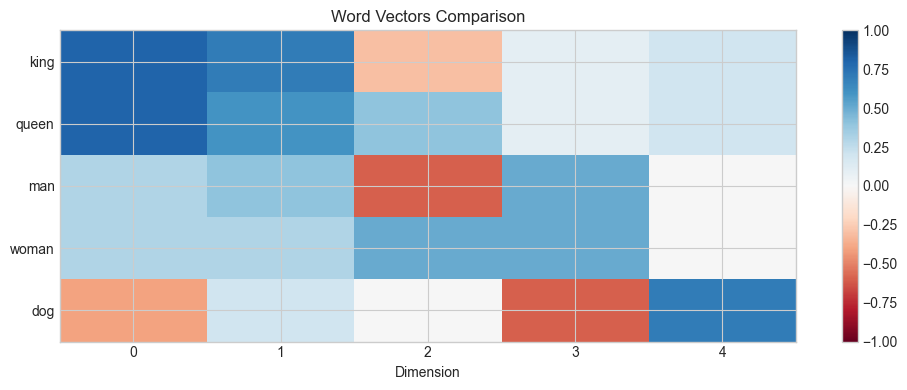

In [4]:
# Compare vectors visually
words_to_compare = ["king", "queen", "man", "woman", "dog"]

fig, ax = plt.subplots(figsize=(10, 4))
vectors = np.array([embeddings[w] for w in words_to_compare])
im = ax.imshow(vectors, cmap='RdBu', aspect='auto', vmin=-1, vmax=1)
ax.set_yticks(range(len(words_to_compare)))
ax.set_yticklabels(words_to_compare)
ax.set_xlabel('Dimension')
ax.set_title('Word Vectors Comparison')
plt.colorbar(im)
plt.tight_layout()
plt.show()

## 3. Similarity Search

Find words that are semantically similar using cosine similarity.

In [5]:
# Similarity between two words
word_pairs = [
    ("king", "queen"),
    ("king", "prince"),
    ("king", "dog"),
    ("man", "woman"),
    ("dog", "cat"),
    ("happy", "sad"),
]

print("Word Pair Similarities:")
print("-" * 40)
for w1, w2 in word_pairs:
    sim = embeddings.similarity(w1, w2)
    bar = "█" * int(sim * 20) if sim > 0 else ""
    print(f"{w1:10} - {w2:10}: {sim:6.3f} {bar}")

Word Pair Similarities:
----------------------------------------
king       - queen     :  0.799 ███████████████
king       - prince    :  0.988 ███████████████████
king       - dog       : -0.087 
man        - woman     :  0.209 ████
dog        - cat       :  0.989 ███████████████████
happy      - sad       : -1.000 


In [6]:
# Find most similar words
query_words = ["king", "dog", "happy"]

for query in query_words:
    print(f"\nMost similar to '{query}':")
    similar = embeddings.most_similar(query, topn=5)
    for word, score in similar:
        print(f"  {word:12} {score:.3f}")


Most similar to 'king':
  prince       0.988
  throne       0.944
  crown        0.890
  big          0.833
  princess     0.813

Most similar to 'dog':
  kitten       0.995
  wolf         0.995
  lion         0.991
  cat          0.989
  puppy        0.988

Most similar to 'happy':
  good         0.965
  princess     0.905
  woman        0.875
  queen        0.874
  girl         0.861


## 4. Word Analogies

The famous "king - man + woman = queen" relationship.

In [7]:
# Classic analogy: king - man + woman = ?
print("Analogy: king - man + woman = ?")
results = embeddings.analogy(positive=["king", "woman"], negative=["man"], topn=3)
for word, score in results:
    print(f"  {word}: {score:.3f}")

Analogy: king - man + woman = ?
  queen: 0.958
  princess: 0.935
  happy: 0.914


In [8]:
# More analogies
analogies = [
    (["queen", "man"], ["woman"], "queen - woman + man = ?"),
    (["puppy", "cat"], ["dog"], "puppy - dog + cat = ?"),
    (["father", "girl"], ["boy"], "father - boy + girl = ?"),
    (["prince", "woman"], ["man"], "prince - man + woman = ?"),
]

for positive, negative, description in analogies:
    print(f"\n{description}")
    results = embeddings.analogy(positive=positive, negative=negative, topn=3)
    for word, score in results:
        print(f"  {word}: {score:.3f}")


queen - woman + man = ?
  king: 0.954
  prince: 0.926
  father: 0.839

puppy - dog + cat = ?
  kitten: 1.000
  wolf: 0.987
  lion: 0.978

father - boy + girl = ?
  mother: 0.996
  woman: 0.973
  princess: 0.844

prince - man + woman = ?
  happy: 0.939
  queen: 0.906
  princess: 0.893


In [9]:
# Find the odd one out
word_groups = [
    ["king", "queen", "prince", "dog"],
    ["dog", "cat", "wolf", "apple"],
    ["happy", "good", "sad", "bad"],
]

print("Find the word that doesn't match:")
print("-" * 40)
for words in word_groups:
    outlier = embeddings.doesnt_match(words)
    print(f"{words} -> '{outlier}'")

Find the word that doesn't match:
----------------------------------------
['king', 'queen', 'prince', 'dog'] -> 'dog'
['dog', 'cat', 'wolf', 'apple'] -> 'apple'
['happy', 'good', 'sad', 'bad'] -> 'bad'


## 5. Visualizing Embeddings with t-SNE

Reduce the 5D embeddings to 2D for visualization.

In [10]:
from sklearn.manifold import TSNE

# Get all words and vectors
words = embeddings.vocab
vectors = np.array([embeddings[w] for w in words])

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=min(5, len(words)-1))
coords = tsne.fit_transform(vectors)

print(f"Reduced {vectors.shape} to {coords.shape}")

Reduced (34, 5) to (34, 2)


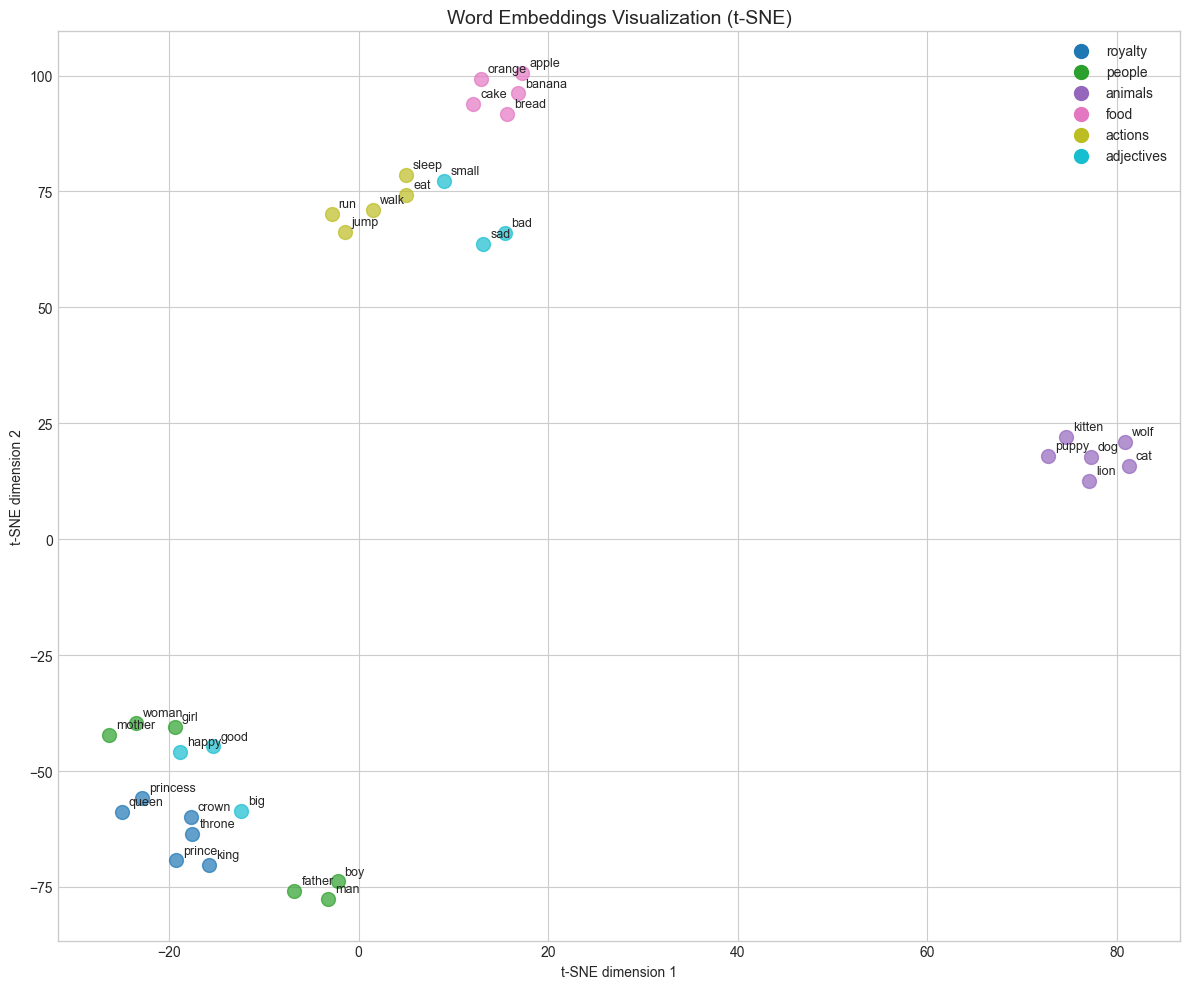

In [11]:
# Define word categories for coloring
categories = {
    "royalty": ["king", "queen", "prince", "princess", "throne", "crown"],
    "people": ["man", "woman", "boy", "girl", "father", "mother"],
    "animals": ["dog", "cat", "puppy", "kitten", "wolf", "lion"],
    "food": ["apple", "banana", "orange", "bread", "cake"],
    "actions": ["run", "walk", "jump", "eat", "sleep"],
    "adjectives": ["good", "bad", "happy", "sad", "big", "small"],
}

# Create color mapping
colors = plt.cm.tab10(np.linspace(0, 1, len(categories)))
word_to_color = {}
for i, (cat, cat_words) in enumerate(categories.items()):
    for w in cat_words:
        word_to_color[w] = colors[i]

# Plot
fig, ax = plt.subplots(figsize=(12, 10))

for i, word in enumerate(words):
    color = word_to_color.get(word, 'gray')
    ax.scatter(coords[i, 0], coords[i, 1], c=[color], s=100, alpha=0.7)
    ax.annotate(word, (coords[i, 0], coords[i, 1]), fontsize=9,
                xytext=(5, 5), textcoords='offset points')

# Add legend
for i, cat in enumerate(categories.keys()):
    ax.scatter([], [], c=[colors[i]], label=cat, s=100)
ax.legend(loc='upper right')

ax.set_title('Word Embeddings Visualization (t-SNE)', fontsize=14)
ax.set_xlabel('t-SNE dimension 1')
ax.set_ylabel('t-SNE dimension 2')
plt.tight_layout()
plt.show()

## 6. Text Classification with Embeddings

Use word embeddings to classify text.

In [12]:
# Training data
train_texts = [
    "king queen prince throne",
    "queen princess crown",
    "king prince throne crown",
    "dog cat puppy",
    "wolf lion dog",
    "cat kitten puppy",
    "apple banana orange",
    "bread cake apple",
    "orange banana bread",
]
train_labels = [
    "royalty", "royalty", "royalty",
    "animals", "animals", "animals",
    "food", "food", "food",
]

# Create classifier
clf = EmbeddingClassifier(embeddings, strategy="centroid")
clf.fit(train_texts, train_labels)

print(f"Trained classifier with {len(clf.classes)} classes: {clf.classes}")

Trained classifier with 3 classes: ['royalty', 'food', 'animals']


In [13]:
# Test classification
test_texts = [
    "king queen",
    "dog wolf",
    "apple cake",
    "prince princess",
    "cat kitten lion",
]

print("Classification Results:")
print("-" * 50)
predictions = clf.predict(test_texts)
probas = clf.predict_proba(test_texts)

for text, pred, proba in zip(test_texts, predictions, probas):
    confidence = max(proba.values())
    print(f"'{text}'")
    print(f"  -> {pred} (confidence: {confidence:.1%})")
    print(f"  Probabilities: {proba}")
    print()

Classification Results:
--------------------------------------------------
'king queen'
  -> royalty (confidence: 67.2%)
  Probabilities: {'royalty': np.float64(0.6715063806129037), 'animals': np.float64(0.222525292729251), 'food': np.float64(0.10596832665784531)}

'dog wolf'
  -> animals (confidence: 62.8%)
  Probabilities: {'royalty': np.float64(0.21323746053153902), 'animals': np.float64(0.6278199962539651), 'food': np.float64(0.1589425432144958)}

'apple cake'
  -> food (confidence: 70.8%)
  Probabilities: {'royalty': np.float64(0.11198351491609651), 'animals': np.float64(0.17969534890190114), 'food': np.float64(0.7083211361820023)}

'prince princess'
  -> royalty (confidence: 68.1%)
  Probabilities: {'royalty': np.float64(0.6810261131106525), 'animals': np.float64(0.2002857795933816), 'food': np.float64(0.11868810729596582)}

'cat kitten lion'
  -> animals (confidence: 62.6%)
  Probabilities: {'royalty': np.float64(0.21844613452384223), 'animals': np.float64(0.6263482599799859), '

## 7. Exploring Vector Arithmetic

Understanding how vector operations create semantic relationships.

In [14]:
# Visualize the king-man+woman=queen relationship
king = embeddings["king"]
man = embeddings["man"]
woman = embeddings["woman"]
queen = embeddings["queen"]

# Compute king - man + woman
result = king - man + woman

# Normalize for comparison
result_norm = result / np.linalg.norm(result)
queen_norm = queen / np.linalg.norm(queen)

print("Vector arithmetic: king - man + woman")
print(f"\nResult vector:     {result_norm.round(3)}")
print(f"Actual 'queen':    {queen_norm.round(3)}")
print(f"\nCosine similarity: {np.dot(result_norm, queen_norm):.3f}")

Vector arithmetic: king - man + woman

Result vector:     [0.615 0.462 0.615 0.077 0.154]
Actual 'queen':    [0.727 0.545 0.364 0.091 0.182]

Cosine similarity: 0.958


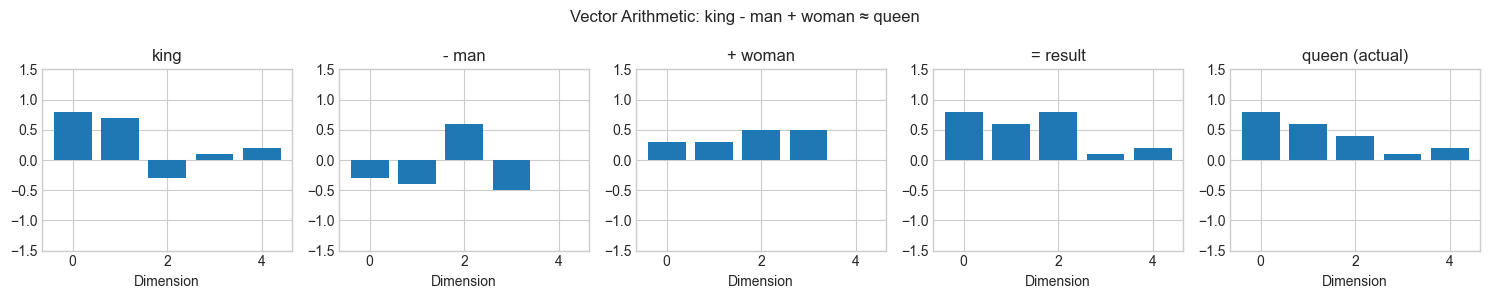

In [15]:
# Visualize the arithmetic
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
vectors_to_plot = [
    ("king", king),
    ("- man", -man),
    ("+ woman", woman),
    ("= result", result),
    ("queen (actual)", queen),
]

for ax, (label, vec) in zip(axes, vectors_to_plot):
    ax.bar(range(len(vec)), vec)
    ax.set_title(label)
    ax.set_ylim(-1.5, 1.5)
    ax.set_xlabel('Dimension')

plt.suptitle('Vector Arithmetic: king - man + woman ≈ queen', fontsize=12)
plt.tight_layout()
plt.show()

## 8. Similarity Matrix

Visualize pairwise similarities between words.

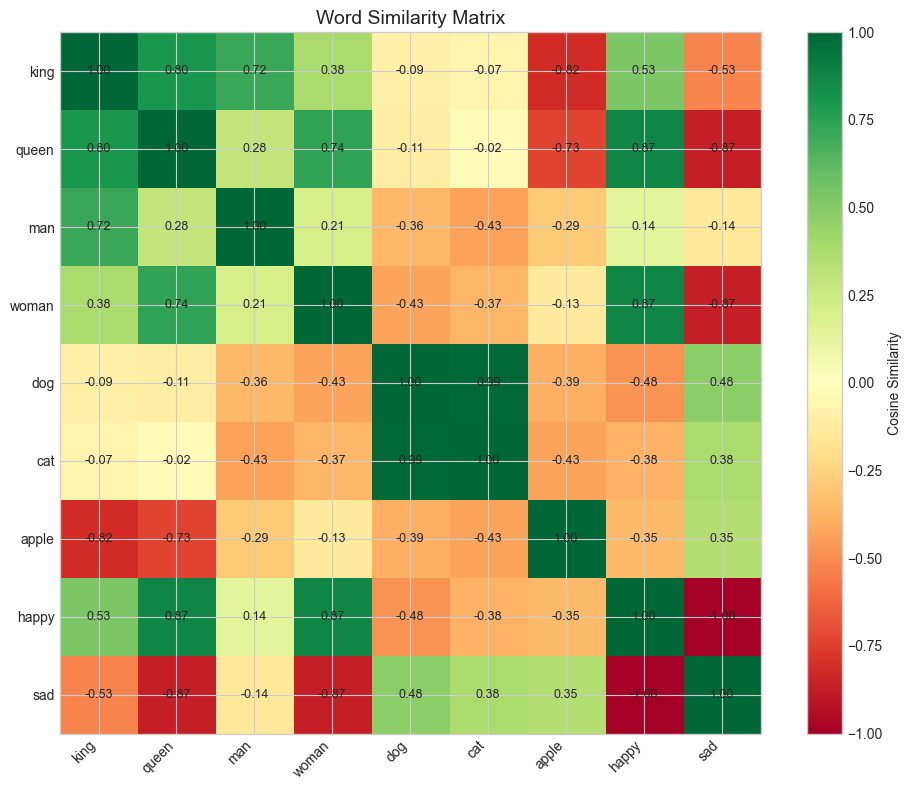

In [16]:
# Select words for similarity matrix
selected_words = ["king", "queen", "man", "woman", "dog", "cat", "apple", "happy", "sad"]

# Compute similarity matrix
n = len(selected_words)
sim_matrix = np.zeros((n, n))

for i, w1 in enumerate(selected_words):
    for j, w2 in enumerate(selected_words):
        sim_matrix[i, j] = embeddings.similarity(w1, w2)

# Plot
fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(sim_matrix, cmap='RdYlGn', vmin=-1, vmax=1)

ax.set_xticks(range(n))
ax.set_yticks(range(n))
ax.set_xticklabels(selected_words, rotation=45, ha='right')
ax.set_yticklabels(selected_words)

# Add values
for i in range(n):
    for j in range(n):
        text = ax.text(j, i, f'{sim_matrix[i, j]:.2f}',
                       ha='center', va='center', fontsize=9)

ax.set_title('Word Similarity Matrix', fontsize=14)
plt.colorbar(im, label='Cosine Similarity')
plt.tight_layout()
plt.show()

## Summary

In this notebook, we explored:

1. **Loading embeddings** - Created semantic word vectors
2. **Similarity search** - Found related words using cosine similarity
3. **Word analogies** - Solved "king - man + woman = queen" style problems
4. **t-SNE visualization** - Reduced dimensions to see semantic clusters
5. **Text classification** - Used embeddings for classification
6. **Vector arithmetic** - Understood how operations create meaning

### Key Insights:

- Words with similar meanings cluster together in embedding space
- Vector arithmetic captures semantic relationships
- Embeddings encode gender, hierarchy, and category information
- Pre-trained embeddings (GloVe, Word2Vec) capture these patterns from large corpora

In [17]:
print("Notebook complete!")

Notebook complete!
